<a href="https://colab.research.google.com/github/prudhvivemula18/Rock-Paper-Scissor/blob/main/Physical%20Activity%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas matplotlib scikit-learn tensorflow


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Function to load data
def load_data(data_type='train'):
    data_path = os.path.join('UCI HAR Dataset', data_type)
    X = np.loadtxt(os.path.join(data_path, f'X_{data_type}.txt'))
    y = np.loadtxt(os.path.join(data_path, f'y_{data_type}.txt'), dtype=int)
    return X, y

# Load train and test data
X_train, y_train = load_data('train')
X_test, y_test = load_data('test')

# Combine for preprocessing
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

# Activity labels
activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

# Print dataset info
print("Features shape:", X.shape)
print("Labels shape:", y.shape)
print("\nActivity counts:")
print(pd.Series(y).map(activity_labels).value_counts())

Features shape: (10299, 561)
Labels shape: (10299,)

Activity counts:
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64


In [ ]:
# Feature Scaling
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert labels to one-hot encoding
import tensorflow as tf
from tensorflow import keras
y_onehot = keras.utils.to_categorical(y - 1)  # UCI labels start at 1

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_onehot, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (8239, 561)
Test data shape: (2060, 561)


In [7]:
# Model Training
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5636 - loss: 1.2004 - val_accuracy: 0.9181 - val_loss: 0.2256
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8705 - loss: 0.3430 - val_accuracy: 0.9478 - val_loss: 0.1414
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9222 - loss: 0.2186 - val_accuracy: 0.9527 - val_loss: 0.1225
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9343 - loss: 0.1805 - val_accuracy: 0.9557 - val_loss: 0.1110
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9524 - loss: 0.1461 - val_accuracy: 0.9587 - val_loss: 0.1001
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9510 - loss: 0.1287 - val_accuracy: 0.9666 - val_loss: 0.0857
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9595 - loss: 0.1066 - val_accuracy: 0.9642 - val_loss: 0.0867
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9595 - loss: 0.1072 - val_accurac

Test Accuracy: 0.9835


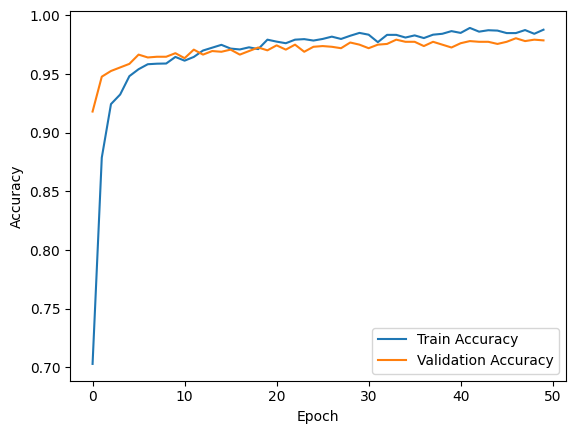

In [8]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
model.save('activity_detection_model.h5')
print("Model saved as 'activity_detection_model.h5'")

Model saved as 'activity_detection_model.h5'


In [10]:
print("Contents of the dataset folder:")
!ls -l 'UCI HAR Dataset'

Contents of the dataset folder:
total 40
-rwxr-xr-x 1 root root    80 Oct 10  2012 activity_labels.txt
-rwxr-xr-x 1 root root  2809 Oct 15  2012 features_info.txt
-rwxr-xr-x 1 root root 15785 Oct 11  2012 features.txt
-rw-r----- 1 root root  6304 Feb 16  2015 README.txt
drwxr-xr-x 3 root root  4096 Nov 30  2012 test
drwxr-xr-x 3 root root  4096 Nov 30  2012 train


In [11]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (8239, 561)
y_train shape: (8239, 6)


In [12]:
sample = X_test[0:1]  # Take 1 sample
pred = model.predict(sample)
print("Predicted class:", np.argmax(pred) + 1)  # +1 to match UCI labels (1-6)
print("Activity:", activity_labels[np.argmax(pred) + 1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted class: 1
Activity: WALKING
